# TAMING THE SPECTRALLY FLOWED SECTORS

We start by importing the libraries that will allow us to work with dataframes (pandas), perform numeric operations on the data (numpy), and to plot data (pyplot). We give them shortened names "pd","np" and "plt" for convenience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import csv

We will first create a function that, given the values of the level $k$ and spectral flowed sector $\omega$, gives us the range of allowed values of the level $N$. This is achieved by first solving the physical state condition for the states on the edge: $$ -\frac{(j+\frac{k}{2}\omega)(j+\frac{k}{2}\omega-1)}{k} + \omega N + N = \frac{1}{2}$$ if $\omega$ even, or $$ -\frac{(j+\frac{k}{2}\omega)(j+\frac{k}{2}\omega-1)}{k} + \omega \left(N-\frac{1}{2}\right) + N = \frac{1}{2}$$ if $\omega$ is odd. We then impose the unitarity constraints $$0 < j < \frac{k+2}{2}$$

Note that, due to GSO projection, if $\omega$ is even, then $N =1/2,3/2,...$ while if $\omega$ si odd, then $N=0,1,2,3,...$. 

As a preliminary, we define functions which give the solution of the on-shell conditions (namely the value of $j$) for the edge states, taking into account whether $\omega$ is even or odd:

In [2]:
def jedge(k,omega,N):
    if omega % 2 == 0 and 1 + k*(-2 + 4*N*(1 + omega)) >= 0:
        #omega is even and j is real
        return (1/2)*(1 - k*omega + np.sqrt(1 + k*(-2 + 4*N*(1 + omega))))
    elif omega % 2 != 0 and 1 + 2*k*(-1 + 2*N)*(1 + omega) >=0:
        #omega is odd and j is real
        return (1/2)*(1 - k*omega + np.sqrt(1 + 2*k*(-1 + 2*N)*(1 + omega)))
    else:
        #j is complex
        return -1

Next, we define a function that returns the first value of $N$ such that $j >0$ for the edge states

In [3]:
def get_first_N(k,omega):
    if omega % 2 == 0:
        #omega is even
        return np.rint(omega*(k*omega-4)/(4 + 4*omega)) + 1/2
    else:
        #omega is odd
        return np.rint((2 + k*omega**2)/(4 + 4*omega))

We now write the function that determines the allowed values of $N$, given $k$ and $\omega$

In [4]:
def get_values_of_N(k,omega):
    allowed_N = []
    N = get_first_N(k,omega)
    while jedge(k,omega,N) < (k+2)/2:
        if jedge(k,omega,N) != -1:
            #if j is not complex, we add the corresponding N to the list of allowed values
            allowed_N.append(N)
        N += 1
    return allowed_N

For fixed $\omega$, the number of allowed levels $N$ behaves quite linearly (with an $\omega$-dependent slope), as seen in the following plot:

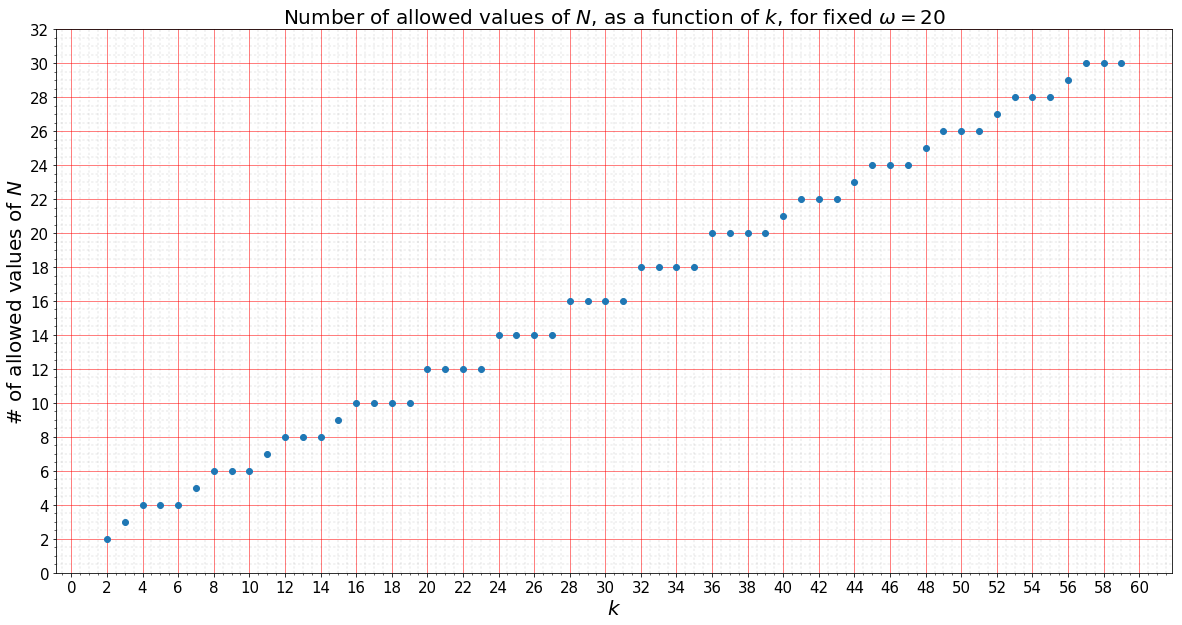

In [5]:
omega=20
#maximum k reached
klim=60
axis_k = []
axis_len_N = []
plt.figure(figsize=(20,10))
for k in range (2,klim):
    axis_k.append(k)
    axis_len_N.append(len(get_values_of_N(k,omega)))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot(axis_k, axis_len_N,linestyle='',marker ='o')
plt.xlabel('$k$',fontsize=20)
plt.ylabel('$\#$ of allowed values of $N$',fontsize=20)
plt.title('Number of allowed values of $N$, as a function of $k$, for fixed $\omega =%d$'%omega,fontsize=20) 
#some extra grid for visibility
plt.grid(True)
#y ticks go in steps of 2
plt.yticks(np.linspace(0, max(axis_len_N)+2, max(axis_len_N)/2+2, endpoint=True))
#x ticks go in steps of 2
plt.xticks(np.linspace(0, klim, klim/2+1, endpoint=True))
#minor grid
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show()

There seem to be some cyclic irregularities though, quite possible there's an "integer part of" somehwere which accounts for that.

KF:[ For large omega, the number of allowed values of N goes as $\frac{k+3}{2}$. For k odd this is an integer. For k=2 mod 4, we take the lower nearest integer, for k=4 mod 4 we take the larger nearest integer. For smaller omega this gets corrected.
]

On the other hand, if we instead fix $k$ and plot the allowed number of levels for different values of $\omega$, we find that it grows at the beginning (i.e. for low $\omega$), and then it oscillates between fixed levels:

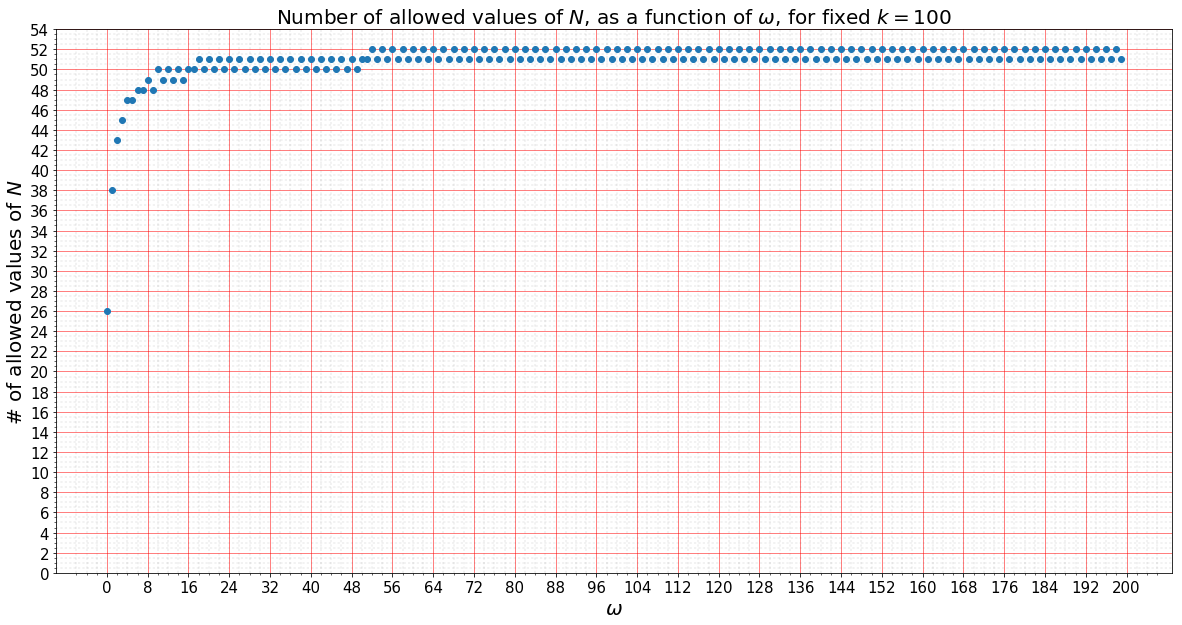

In [58]:
k=100
#maximum omega reached
omegalim=200
axis_omega = []
axis_len_N =[]
plt.figure(figsize=(20,10))
for omega in range (0,omegalim):
    axis_omega.append(omega)
    axis_len_N.append(len(get_values_of_N(k,omega)))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot(axis_omega, axis_len_N,linestyle='',marker ='o')
plt.xlabel('$\omega $',fontsize=20)
plt.ylabel('$\#$ of allowed values of $N$',fontsize=20)
plt.title('Number of allowed values of $N$, as a function of $\omega$, for fixed $k = %d$'%k,fontsize=20) 
#some extra grid for visibility
plt.grid(True)
#y ticks go in steps of 2
plt.yticks(np.linspace(0, max(axis_len_N)+2, max(axis_len_N)/2+2, endpoint=True))
#x ticks go in steps of 2
plt.xticks(np.linspace(0, omegalim, omegalim/8+1, endpoint=True))
#minor grid
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')

plt.show()

KF:
[
After some numerology, I got to the expression

$$
\sim \frac{(k+6)\omega}{4(\omega +1)} + \frac{k}{4} + \mathcal{O}\left(\frac{1}{k}\right) \; ,
$$

controlling the number of allowed values of $N$ as a function of $k,\omega$. The first term is responsible for the "tail" at low $\omega$, and the second term controls $\omega=0$. Recall that in the unflowed case $\omega=0$ the number of allowed values of $N$ goes as $k/4$. I have also included a possible $1/k$ term, but as far as the dependance on $\omega$ is concerned this should be it.

This expression is also in line with the behaviour at large $\omega$ as a function of $k$, from the preceeding analysis, which gave $\frac{k}{2}+\frac{3}{2}$ for very large $\omega$.

After checking a few cases, this seems to be a fair approximation. But we need to take care of the "integer part of" to get something closer, in particular for $\omega=0$.
]

In [59]:
#uncomment if needed

#import csv

#with open('test500.csv', 'w') as f:
#    writer = csv.writer(f)
#    writer.writerow(axis_omega)
#    writer.writerow(axis_len_N)

Next, we want to write a function that, given that allowed values of $N$ determined above, computes the allowed values of $r$ by solving the general physical state condition $$-\frac{(j+\frac{k}{2}\omega)(j+\frac{k}{2}\omega-1)}{k} -\omega\left(r+\frac{1}{2}\right) + N =\frac{1}{2} $$

As a preliminary step, we write a function that gives the on-shell value of $j$ for a generic state:

In [8]:
def j(k,omega,N,r):
    if 1 + k*(4*N - 2*(1 + omega + 2*omega*r)) >= 0:
        #j is real
        return (1/2)*(1 - k*omega + np.sqrt(1 + k*(4*N - 2*(1 + omega + 2*omega*r))))
    else:
        #j is complex
        return -1

Next, we write the actual function that finds the allowed values of $r$. We need to remember that for $\omega$ even $r$ starts at $-N-1/2$, while for $\omega$ odd it starts at $-N$. For the allowed values of $N$ we determined, the initial value of $r$, namely $r = -N-1/2$ ($\omega$ even) or $r = -N$ ($\omega$ odd) does not violate the upper unitarity bound. Since increasing $r$ decreases $j$, it follows that the upper bound will never be violated. Hence, we only need to check that $j$ is real and $j >0$ in order to see where we stop in $r$.

In [9]:
def get_N_and_r(k,omega):
    allowedN = get_values_of_N(k,omega)
    omega_N_r = [] 
    for elem in allowedN:
        #Initialize at the proper value of r
        if omega % 2 == 0:
            #omega is even 
            r = - elem -(1/2)
        else:
            #omega is odd
            r = -elem
        if omega != 0 :
            while j(k,omega,elem,r) != -1 and j(k,omega,elem,r) > 0:
                #If j is real and greater than zero, we append the corresponding r to the list of allowed values
                omega_N_r.append([omega,elem,r])
                r+=1
        else:
            while r <= elem + (1/2):
                omega_N_r.append([omega,elem,r])
                r+=1
    return omega_N_r

Given a value of $k$, we can now plot the result for the allowed $(N,r)$ values for different values of omega. Let us use $k=20$ as an example:

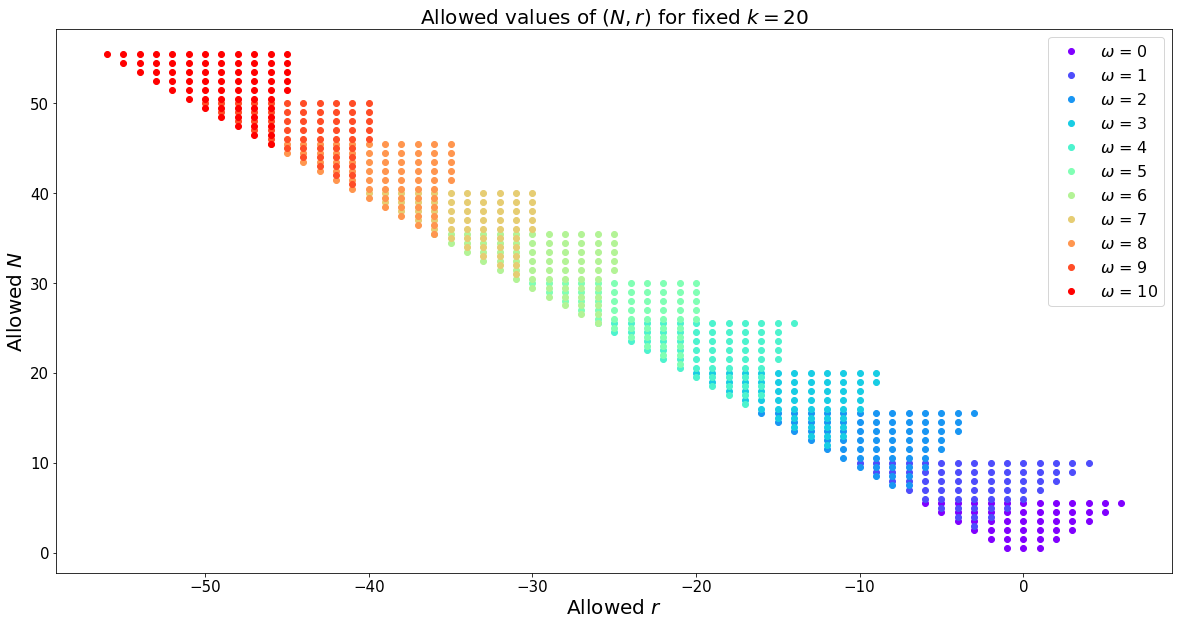

In [62]:
#Fix k
k=20
#Fix the number of different omegas to plot
n=10
#Assign colors to the different omegas
color=iter(cm.rainbow(np.linspace(0,1,n+1)))
plt.figure(figsize=(20,10))
for omega in range(0,n+1):
    df = pd.DataFrame(get_N_and_r(k,omega),columns=['omega', 'N', 'r'])
    plotraxis = df['r']
    plotNaxis = df['N']
    c=next(color)
    plt.plot(plotraxis, plotNaxis,c=c,linestyle='',marker ='o',label = '$\omega$ = %d' %omega)

plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Allowed $r$',fontsize=20)
plt.ylabel('Allowed $N$',fontsize=20)
plt.title('Allowed values of $(N,r)$ for fixed $k = %d$'%k,fontsize=20) 
plt.show()

Next, recall the energy is $E = 2j + r + \bar{r} + k\omega$ and the spin is $s = r-\bar{r}\,$. In order to pair up points (level-matching) we need $N-\bar{N} = \omega(r-\bar{r})$. So we first write a function that makes all the possible left-right pairings that respect level-matching, and for each possible pairings computes and stores the values of $(\omega,N,r,\bar{N},\bar{r},E,s)$ and returns it as a dataframe:

In [10]:
def physical_states(k,omega):
    finalarray = []
    for elem in get_N_and_r(k,omega):
        for elem2 in get_N_and_r(k,omega):
            if elem[1]-elem2[1]== elem[0]*(elem[2]-elem2[2]):
            #If level-matching is satisfied, store the tuple (omega, N, r, bar{N},bar{r},j,E,s)
                finalarray.append([k,elem[0],elem[1],elem[2],elem2[1],elem2[2],j(k,elem[0],elem[1],elem[2]),
                               2*j(k,elem[0],elem[1],elem[2])+elem[2]+elem2[2]+k*elem[0],elem[2]-elem2[2]])
    return pd.DataFrame(finalarray,columns=['k','omega', 'N', 'r','N bar','r bar','j','E','s'])

For example, let us display all the physical states for $(k,\omega) = (10,1)$, ordered first by increasing spin and then by increasing energy

In [64]:
df=physical_states(10,1).drop(['k','omega'], 1).set_index(['s','E']).sort_index()
df

N    r  N bar  r bar         j
s    E                                          
-3.0 11.000000  2.0 -2.0    5.0    1.0  1.000000
-2.0 10.000000  2.0 -2.0    4.0    0.0  1.000000
     11.177447  3.0 -3.0    5.0   -1.0  2.588723
     11.688578  3.0 -2.0    5.0    0.0  1.844289
     12.000000  3.0 -1.0    5.0    1.0  1.000000
-1.0 9.000000   2.0 -2.0    3.0   -1.0  1.000000
     10.177447  3.0 -3.0    4.0   -2.0  2.588723
     10.688578  3.0 -2.0    4.0   -1.0  1.844289
     10.763055  4.0 -4.0    5.0   -3.0  3.881527
     11.000000  3.0 -1.0    4.0    0.0  1.000000
     11.524175  4.0 -3.0    5.0   -2.0  3.262087
     12.177447  4.0 -2.0    5.0   -1.0  2.588723
     12.688578  4.0 -1.0    5.0    0.0  1.844289
     13.000000  4.0  0.0    5.0    1.0  1.000000
 0.0 8.000000   2.0 -2.0    2.0   -2.0  1.000000
     9.177447   3.0 -3.0    3.0   -3.0  2.588723
     9.688578   3.0 -2.0    3.0   -2.0  1.844289
     9.763055   4.0 -4.0    4.0   -4.0  3.881527
     10.000000  3.0 -1.0    3.0   -1.0  1.000000
     10.000000  5.0 -5.0    5.0   -5.0  5.000000
     10.524175  4.0 -3.0    4.0   -3.0  3.262087
     10.916473  5.0 -4.0    5.0   -4.0  4.458236
     11.177447  4.0 -2.0    4.0   -2.0  2.588723
     11.688578  4.0 -1.0    4.0   -1.0  1.844289
     11.763055  5.0 -3.0    5.0   -3.0  3.881527
     12.000000  4.0  0.0    4.0    0.0  1.000000
     12.524175  5.0 -2.0    5.0   -2.0  3.262087
     13.177447  5.0 -1.0    5.0   -1.0  2.588723
     13.688578  5.0  0.0    5.0    0.0  1.844289
     14.000000  5.0  1.0    5.0    1.0  1.000000
 1.0 9.000000   3.0 -1.0    2.0   -2.0  1.000000
     10.177447  4.0 -2.0    3.0   -3.0  2.588723
     10.688578  4.0 -1.0    3.0   -2.0  1.844289
     10.763055  5.0 -3.0    4.0   -4.0  3.881527
     11.000000  4.0  0.0    3.0   -1.0  1.000000
     11.524175  5.0 -2.0    4.0   -3.0  3.262087
     12.177447  5.0 -1.0    4.0   -2.0  2.588723
     12.688578  5.0  0.0    4.0   -1.0  1.844289
     13.000000  5.0  1.0    4.0    0.0  1.000000
 2.0 10.000000  4.0  0.0    2.0   -2.0  1.000000
     11.177447  5.0 -1.0    3.0   -3.0  2.588723
     11.688578  5.0  0.0    3.0   -2.0  1.844289
     12.000000  5.0  1.0    3.0   -1.0  1.000000
 3.0 11.000000  5.0  1.0    2.0   -2.0  1.000000

Interestingly, we can see that if we fix $\omega$ and group the states by their $j$ values, states with the same $j$ fall into diamonds in the $(E,s)$ plane. In order to see this, we define a function that takes the value of $(k,\omega)$ and groups the physical states by common values of $j$:

In [11]:
def physical_by_j(k,omega):
    #Compute the physical states:
    df=physical_states(k,omega)
    #Pull out a list of the values of j that occur:
    list_of_j = df['j'].unique()
    #For every element on this list, generate the corresponding sub-dataframe:
    i=0
    list_of_subframes = {};
    for elem in list_of_j:
        list_of_subframes['frame_{}'.format(i)] = df[df['j']==elem] 
        i+=1
    return list_of_subframes

For example, let us plot these diamonds for some fixed $(k,\omega)$ combination:

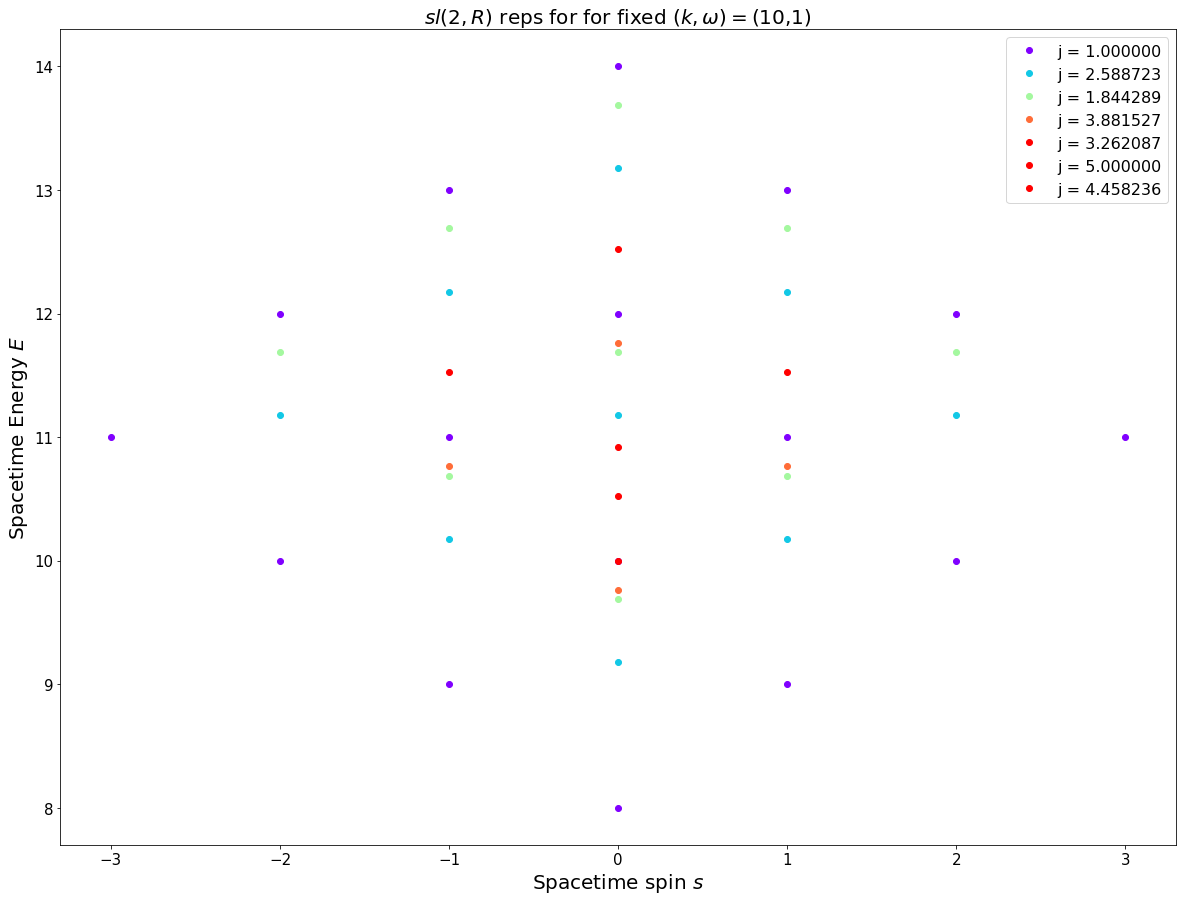

In [66]:
#Set (k,omega)
k=10
omega=1
#We first determine and store the number of subframes (i.e. of different values of j that occur)
n = len(physical_by_j(k,omega))
#Then we assign a color to each of them
color=iter(cm.rainbow(np.linspace(0,2,n+1)))
plt.figure(figsize=(20,15))
#Loop over the subframes
for i in range(1,n+1):
    #Slice out the desired subframe
    current_subframe=physical_by_j(k,omega)['frame_{}'.format(i-1)]
    #Store its j value
    current_j= current_subframe['j'].iloc[0]
    
    Eaxis = current_subframe['E']
    saxis = current_subframe['s']
    c=next(color)
    plt.plot(saxis, Eaxis,c=c,linestyle='',marker ='o',label = 'j = %f' %current_j)

plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Spacetime spin $s$',fontsize=20)
plt.ylabel('Spacetime Energy $E$',fontsize=20)
plt.title('$sl(2,R)$ reps for for fixed $(k,\omega)=$(%d,%d)'%(k,omega),fontsize=20) 
plt.show()

Finally, we want to take all physical states for given $(k,\omega)$, and look at the ones with lowest energy for given spin. We write a function that pulls out this data:

In [64]:
def Regge(k,omega):
    #Compute the physical states:
    df=physical_states(k,omega)       
    #Group them by spin and slice out the one with minimal energy
    #temp = df.loc[df.groupby('s').E.idxmin()].reset_index(drop=True)
    temp = df[df.E==df.groupby('s').E.transform('min')].sort_values(['s'],ascending=True).reset_index(drop=True)
    return temp

For example, let us pull out a dataframe containing the particles with minimal energy for given spin for $(k,\omega)=(10,1)$

In [65]:
Regge(10,1)

,k,omega,N,r,N bar,r bar,j,E,s
0,10,1,2.0,-2.0,5.0,1.0,1.0,11.0,-3.0
1,10,1,2.0,-2.0,4.0,0.0,1.0,10.0,-2.0
2,10,1,2.0,-2.0,3.0,-1.0,1.0,9.0,-1.0
3,10,1,2.0,-2.0,2.0,-2.0,1.0,8.0,0.0
4,10,1,3.0,-1.0,2.0,-2.0,1.0,9.0,1.0
5,10,1,4.0,0.0,2.0,-2.0,1.0,10.0,2.0
6,10,1,5.0,1.0,2.0,-2.0,1.0,11.0,3.0


In [181]:
def Econt(k,omega,s):
    return np.absolute(s) + (k*omega) / 2 +   ( 1/(2*k) - 1) / omega

We can now fix a $k$ and plot the leading Regge trajectory for different values of omega:

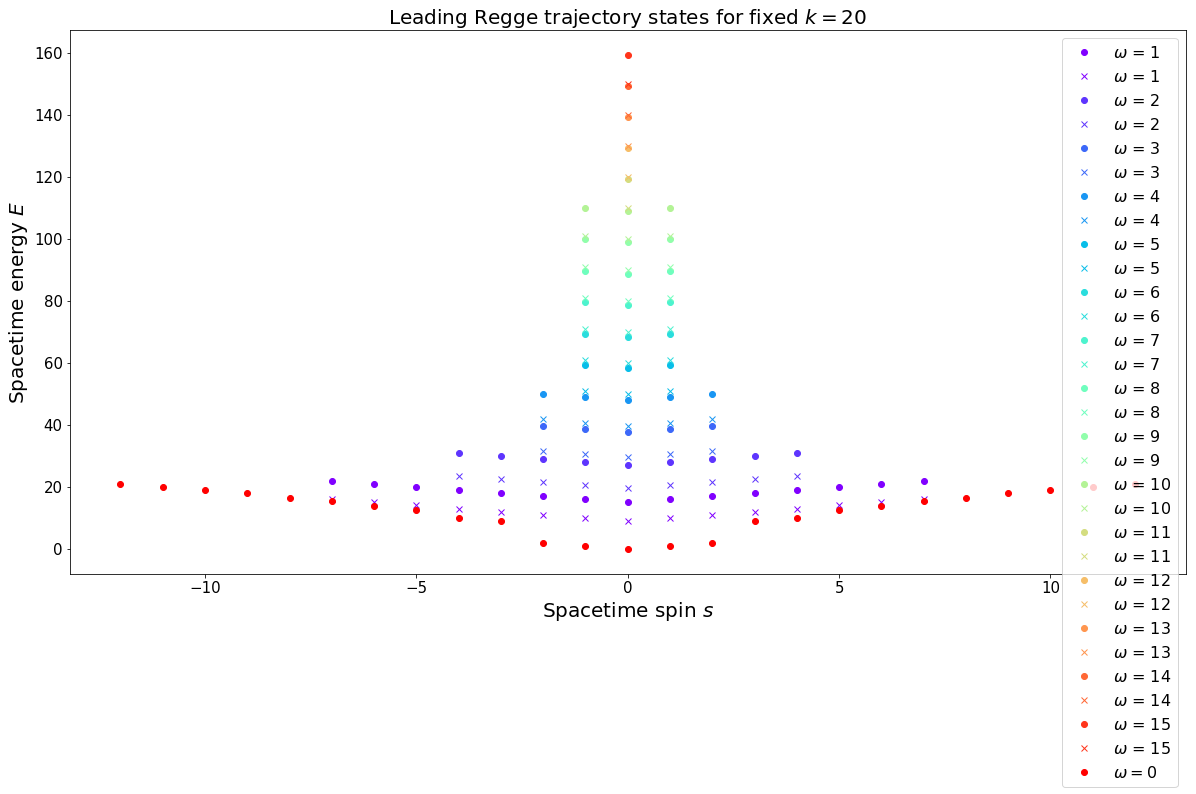

In [182]:
#Fix k
k=20
#Fix the number of different omegas to plot
n=15
#Assign colors to the different omegas
color=iter(cm.rainbow(np.linspace(0,1,n+1)))
plt.figure(figsize=(20,10))
for omega in range(1,n+1):
    df = Regge(k,omega)
    s_axis = df['s']
    E_axis = df['E']
    E_cont =[]
    for elem in s_axis:
        E_cont.append(Econt(k,omega,elem))         
    c=next(color)
    plt.plot(s_axis, E_axis,c=c,linestyle='',marker ='o',label = '$\omega$ = %d' %omega)
    plt.plot(s_axis, E_cont,c=c,linestyle='',marker='x',label = '$\omega$ = %d' %omega)

df_zero = Regge(k,0)
s_zero = df_zero['s']
E_zero = df_zero['E']
plt.plot(s_zero, E_zero,c='red',linestyle='',marker = 'o',label='$\omega =0$')

plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Spacetime spin $s$',fontsize=20)
plt.ylabel('Spacetime energy $E$',fontsize=20)
plt.title('Leading Regge trajectory states for fixed $k = %d$'%k,fontsize=20) 
plt.show()

The picture makes it clear that the absolute lightest states for given spin, meaning the "absolute" leading Regge trajectory, have $\omega=1$

Finally, we generate a big dataframe that contains, for various values of $(k,\omega)$ the leading Regge trajectory states with their full list of quantum numbers:

In [13]:
def big_Regge(number_k,number_omega):
    df_row_merged = pd.DataFrame()
    for i in range(2,number_k+2):
        for j in range(0,number_omega+1):
            temp = Regge(i,j)
            df_row_merged = pd.concat([df_row_merged, temp], ignore_index=True)
    return df_row_merged.set_index(['k','omega']).sort_index()

For example, if we want all the leading Regge trajectory states for $k=2,3,4,5$ and $\omega =1,2,3$ for each of them, we do

In [19]:
big_Regge(4,3)

N    r  N bar  r bar         j         E    s
k omega                                                 
2 0      0.5 -1.0    0.5    1.0  1.000000  2.000000 -2.0
  0      0.5 -1.0    0.5    0.0  1.000000  1.000000 -1.0
  0      0.5 -1.0    0.5   -1.0  1.000000  0.000000  0.0
  0      0.5  0.0    0.5   -1.0  1.000000  1.000000  1.0
  0      0.5  1.0    0.5   -1.0  1.000000  2.000000  2.0
  1      1.0 -1.0    1.0   -1.0  1.000000  2.000000  0.0
  2      1.5 -2.0    1.5   -2.0  1.372281  2.744563  0.0
  3      2.0 -2.0    2.0   -2.0  1.000000  4.000000  0.0
3 0      1.5 -2.0    1.5    2.0  2.302776  4.605551 -4.0
  0      1.5 -2.0    1.5    1.0  2.302776  3.605551 -3.0
  0      0.5 -1.0    0.5    1.0  1.000000  2.000000 -2.0
  0      0.5 -1.0    0.5    0.0  1.000000  1.000000 -1.0
  0      0.5 -1.0    0.5   -1.0  1.000000  0.000000  0.0
  0      0.5  0.0    0.5   -1.0  1.000000  1.000000  1.0
  0      0.5  1.0    0.5   -1.0  1.000000  2.000000  2.0
  0      1.5  1.0    1.5   -2.0  2.302776  3.605551  3.0
  0      1.5  2.0    1.5   -2.0  2.302776  4.605551  4.0
  1      1.0 -1.0    2.0    0.0  0.802776  3.605551 -1.0
  1      1.0 -1.0    1.0   -1.0  0.802776  2.605551  0.0
  1      2.0  0.0    1.0   -1.0  0.802776  3.605551  1.0
  2      1.5 -2.0    1.5   -2.0  1.000000  4.000000  0.0
  3      2.0 -2.0    2.0   -2.0  0.272002  5.544004  0.0
4 0      1.5 -2.0    1.5    2.0  2.561553  5.123106 -4.0
  0      1.5 -2.0    1.5    1.0  2.561553  4.123106 -3.0
  0      0.5 -1.0    0.5    1.0  1.000000  2.000000 -2.0
  0      0.5 -1.0    0.5    0.0  1.000000  1.000000 -1.0
  0      0.5 -1.0    0.5   -1.0  1.000000  0.000000  0.0
  0      0.5  0.0    0.5   -1.0  1.000000  1.000000  1.0
  0      0.5  1.0    0.5   -1.0  1.000000  2.000000  2.0
  0      1.5  1.0    1.5   -2.0  2.561553  4.123106  3.0
  0      1.5  2.0    1.5   -2.0  2.561553  5.123106  4.0
  1      1.0 -1.0    2.0    0.0  0.561553  4.123106 -1.0
  1      1.0 -1.0    1.0   -1.0  0.561553  3.123106  0.0
  1      2.0  0.0    1.0   -1.0  0.561553  4.123106  1.0
  2      1.5 -2.0    3.5   -1.0  0.531129  6.062258 -1.0
  2      1.5 -2.0    1.5   -2.0  0.531129  5.062258  0.0
  2      3.5 -1.0    1.5   -2.0  0.531129  6.062258  1.0
  3      3.0 -3.0    3.0   -3.0  0.844289  7.688578  0.0
5 0      1.5 -2.0    1.5    2.0  2.791288  5.582576 -4.0
  0      1.5 -2.0    1.5    1.0  2.791288  4.582576 -3.0
  0      0.5 -1.0    0.5    1.0  1.000000  2.000000 -2.0
  0      0.5 -1.0    0.5    0.0  1.000000  1.000000 -1.0
  0      0.5 -1.0    0.5   -1.0  1.000000  0.000000  0.0
  0      0.5  0.0    0.5   -1.0  1.000000  1.000000  1.0
  0      0.5  1.0    0.5   -1.0  1.000000  2.000000  2.0
  0      1.5  1.0    1.5   -2.0  2.791288  4.582576  3.0
  0      1.5  2.0    1.5   -2.0  2.791288  5.582576  4.0
  1      1.0 -1.0    3.0    1.0  0.291288  5.582576 -2.0
  1      1.0 -1.0    2.0    0.0  0.291288  4.582576 -1.0
  1      1.0 -1.0    1.0   -1.0  0.291288  3.582576  0.0
  1      2.0  0.0    1.0   -1.0  0.291288  4.582576  1.0
  1      3.0  1.0    1.0   -1.0  0.291288  5.582576  2.0
  2      2.5 -3.0    2.5   -3.0  1.437171  6.874342  0.0
  3      3.0 -3.0    3.0   -3.0  0.088723  9.177447  0.0

Finally, we export a big dataset of Regge states to an excel spreadsheet

In [20]:
big_Regge(25,25).to_csv('ReggeTrajectory.csv', sep=',')

If we want just the $\omega=1$ sector, we export:

In [21]:
regge_omega_one=big_Regge(25,1).reset_index().drop(['omega','j'],1).set_index(['k','s'])

In [22]:
regge_omega_one.to_csv('ReggeOmegaOneSector.csv', sep=',')

KF:
[ we could also ask ourselves if, even if the states at the edge do not satisfy the unitarity bounds for some $N$, there could be inner states which do. Since the solution for $j$ from the on-shell condition is

$$
j(r)=\frac{1}{2}\left( 1-k\omega + \sqrt{1+k(4N-2-2\omega-2\omega r)} \right) \; ,
$$

then $j$ is a decreasing function of $r$. If the state at the edge (with minimum $r$, equal to $-N-1/2$ if $\omega$ is even, or $-N$ if $\omega$ is odd) is not unitary, then either $j\leq 0$ or $2j\geq k+2$. In the first case, increasing $r$ will not make unitary states appear since $j$ will become even more negative. On the other hand, in the second case it might be that there is a value of $r$ for which $j(r)$ is unitary! In fact, these values of $r$ will always exist: if $2j\geq k+2$ for the edge states this means that $N$ is too big; this can always be compensated by shifting $r$, so that $j$ goes down to smaller values.

Here is the code that does this:


In [14]:
#we first define j as before, just to be safe
def j(k,omega,N,r):
    if 1 + k*(4*N - 2*(1 + omega + 2*omega*r)) >= 0:
        #j is real
        return (1/2)*(1 - k*omega + np.sqrt(1 + k*(4*N - 2*(1 + omega + 2*omega*r))))
    else:
        #j is complex
        return -1

In [15]:
#there is an infinite amount of further states that we must consider; we introduce 
#number_after_Nmax which artificially caps
#the computation of these states.
def get_further_N(k,omega,number_after_Nmax):
    further_allowed_N = []
    #the starting level is now the maximum level allowed at the edge
    Nmax_plus_one = max(get_values_of_N(k,omega)) + 1
    N=Nmax_plus_one
    while N <= Nmax_plus_one + number_after_Nmax - 1:
        further_allowed_N.append(N)
        N += 1
    return further_allowed_N

In [16]:
# we now proceed as before to get all the possible values of r for a given, 
#while spanning all the values of N we admitted before;
def get_further_N_and_r(k,omega,number_after_Nmax):
    further_allowed_N = get_further_N(k,omega,number_after_Nmax)
    omega_N_r = [] 
    if omega != 0:
        for elem in further_allowed_N:
            non_unitary_r = []
            if omega % 2 == 0:
                #omega is even 
                r = - elem -(1/2)
            else:
                r = - elem
            while j(k,omega,elem,r) >= ((k+2)/2):
                non_unitary_r.append(r)
                r+=1
        
            rmin = max(non_unitary_r)+1
            while j(k,omega,elem,rmin) != -1 and j(k,omega,elem,rmin) > 0:
                omega_N_r.append([omega,elem,rmin])
                rmin += 1
            
    return omega_N_r

In [17]:
def all_N_and_r(k,omega,number_after_Nmax):
    N_and_r=[]
    for elem1 in get_N_and_r(k,omega):
        N_and_r.append(elem1)
    for elem2 in get_further_N_and_r(k,omega,number_after_Nmax):
        N_and_r.append(elem2)
    return N_and_r

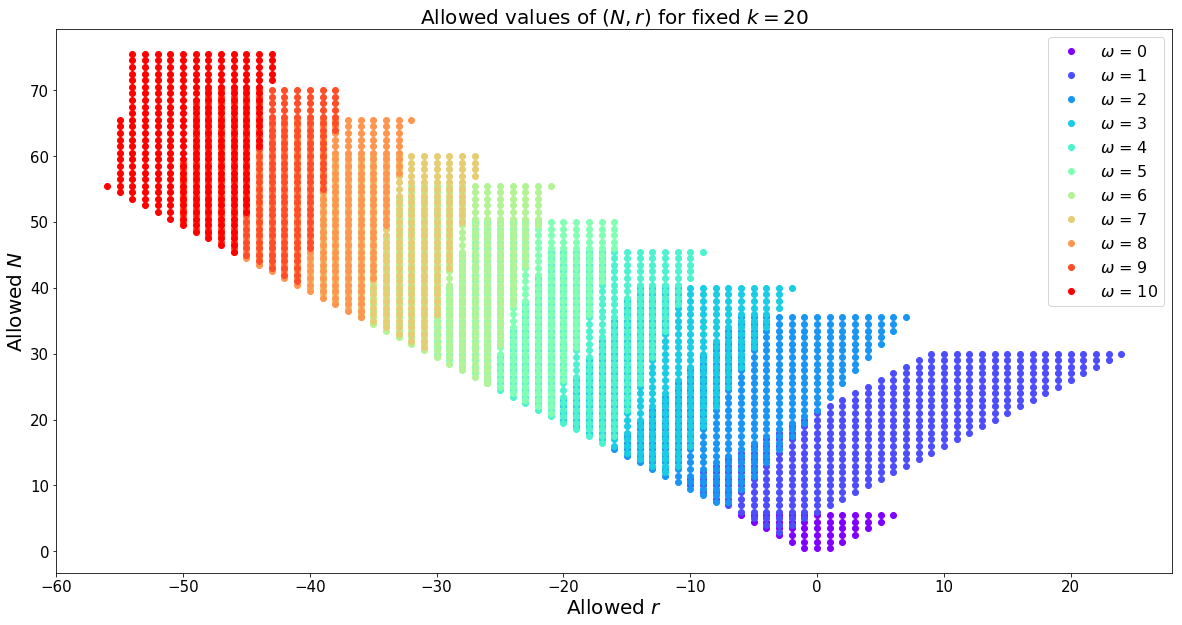

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

#fix rmax
number_after_Nmax=20
#Fix k
k=20
#Fix the number of different omegas to plot
n=10
#Assign colors to the different omegas
color=iter(cm.rainbow(np.linspace(0,1,n+1)))
plt.figure(figsize=(20,10))
for omega in range(0,n+1):
    dffurther = pd.DataFrame(all_N_and_r(k,omega,number_after_Nmax),columns=['omega', 'N', 'r'])
    raxis = dffurther['r']
    Naxis = dffurther['N']
    c=next(color)
    plt.plot(raxis, Naxis,c=c,linestyle='',marker ='o',label = '$\omega$ = %d' %omega)
    
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Allowed $r$',fontsize=20)
plt.ylabel('Allowed $N$',fontsize=20)
plt.title('Allowed values of $(N,r)$ for fixed $k = %d$'%k,fontsize=20) 
    
plt.show()

Note that the caps on allowed $r$ are artificial for $\omega\geq 1$: in the flowed sectors $r$ can go all the way to $\infty$.

We must now redo the Regge computation, since there are new states with new spin; for that we start by going to the (E,s) plane to have a better grasp. Since we must now take all states (both the first ones we got, and the 'further' ones), let's start by making a big array of all allowed states

In [18]:
def all_physical_states(k,omega,number_after_Nmax):
    all_finalarray = []
    for elem in all_N_and_r(k,omega,number_after_Nmax):
        for elem2 in all_N_and_r(k,omega,number_after_Nmax):
            if elem[1]-elem2[1]== elem[0]*(elem[2]-elem2[2]):
            #If level-matching is satisfied, store the tuple (omega, N, r, bar{N},bar{r},j,E,s)
                all_finalarray.append([k,elem[0],elem[1],elem[2],elem2[1],elem2[2],j(k,elem[0],elem[1],elem[2]),
                               2*j(k,elem[0],elem[1],elem[2])+elem[2]+elem2[2]+k*elem[0],elem[2]-elem2[2]])
    return pd.DataFrame(all_finalarray,columns=['k','omega', 'N', 'r','N bar','r bar','j','E','s'])

In [19]:
#group physical states by j, as before
def all_physical_by_j(k,omega,number_after_Nmax):
    #Compute the physical states:
    df=all_physical_states(k,omega,number_after_Nmax)
    #Pull out a list of the values of j that occur:
    list_of_j = df['j'].unique()
    #For every element on this list, generate the corresponding sub-dataframe:
    i=0
    list_of_subframes = {};
    for elem in list_of_j:
        list_of_subframes['frame_{}'.format(i)] = df[df['j']==elem] 
        i+=1
    return list_of_subframes

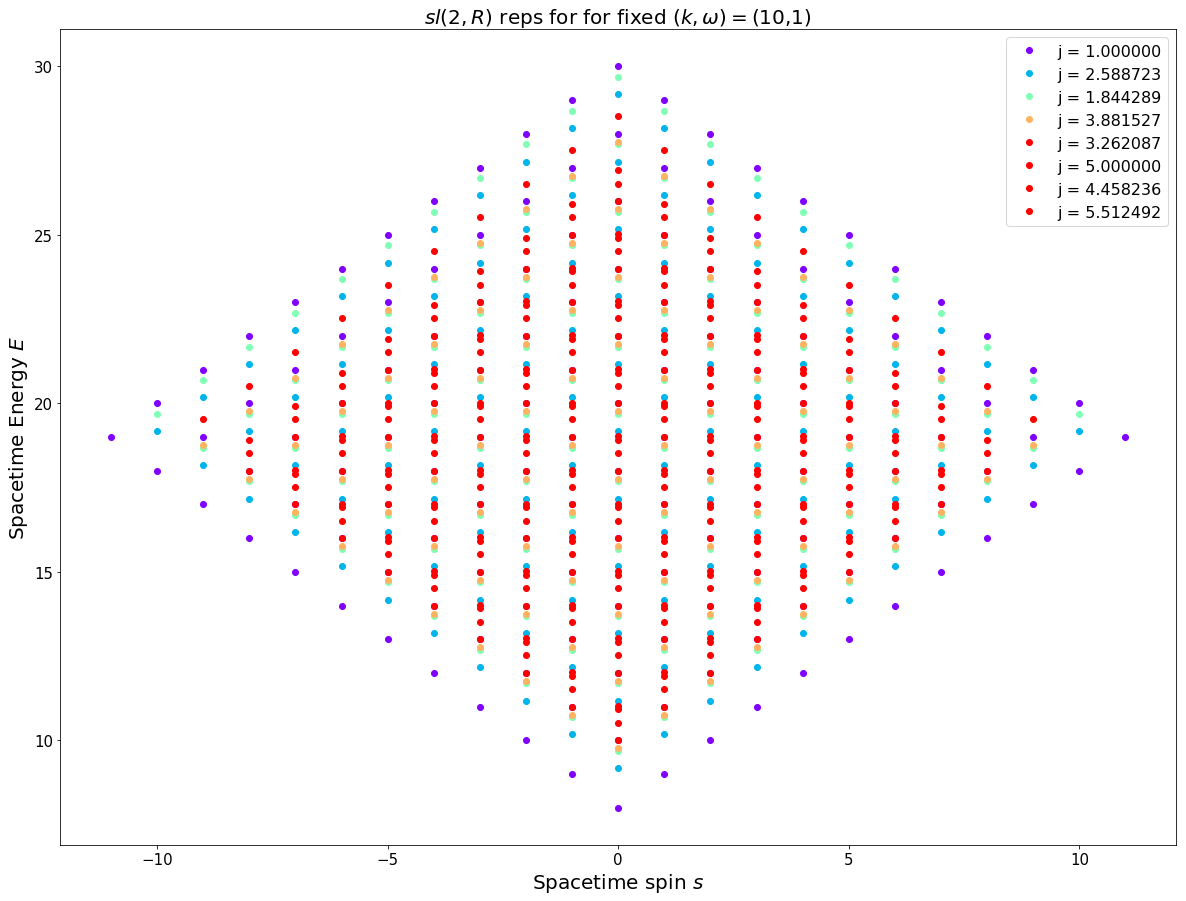

In [30]:
#Set (k,omega)
k=10
omega=1
number_after_Nmax=8
#We first determine and store the number of subframes (i.e. of different values of j that occur)
n = len(all_physical_by_j(k,omega,number_after_Nmax))
#Then we assign a color to each of them
color=iter(cm.rainbow(np.linspace(0,2,n+1)))
plt.figure(figsize=(20,15))
#Loop over the subframes
for i in range(1,n+1):
    #Slice out the desired subframe
    current_subframe=all_physical_by_j(k,omega,number_after_Nmax)['frame_{}'.format(i-1)]
    #Store its j value
    current_j= current_subframe['j'].iloc[0]
    
    Eaxis = current_subframe['E']
    saxis = current_subframe['s']
    c=next(color)
    plt.plot(saxis, Eaxis,c=c,linestyle='',marker ='o',label = 'j = %f' %current_j)

plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Spacetime spin $s$',fontsize=20)
plt.ylabel('Spacetime Energy $E$',fontsize=20)
plt.title('$sl(2,R)$ reps for for fixed $(k,\omega)=$(%d,%d)'%(k,omega),fontsize=20) 
plt.show()

The "diamonds within diamonds" look of this figure is artificial: it comes from the artificial cap on spin, which depends on $\omega$. The physical information here is that higher values of $j$ have higher energies, together with the fact that any given $\omega,j$ organises in diamonds.

In [20]:
def all_Regge(k,omega,number_after_Nmax):
    #Compute the physical states:
    df=all_physical_states(k,omega,number_after_Nmax)       
    #Group them by spin and slice out the one with minimal energy
    temp = df[df.E==df.groupby('s').E.transform('min')].sort_values(['s'],ascending=True).reset_index(drop=True)
    #temp = df.loc[df.groupby('s').E.idxmin()].reset_index(drop=True)
    return temp

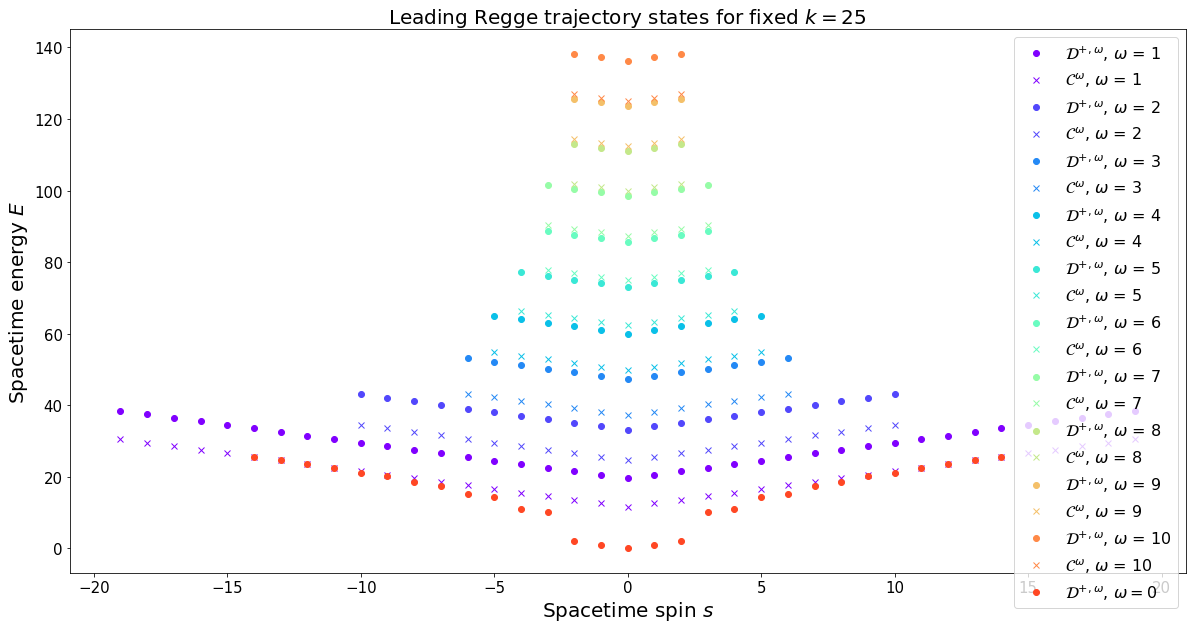

In [188]:
#Fix k
k=25
number_after_Nmax=10
#Fix the number of different omegas to plot
n=11
#Assign colors to the different omegas
color=iter(cm.rainbow(np.linspace(0,1,n+1)))
plt.figure(figsize=(20,10))
for omega in range(1,n):
    df = all_Regge(k,omega,number_after_Nmax)
    s_axis = df['s']
    E_axis = df['E']
    E_cont=[]
    for elem in s_axis:
        E_cont.append(Econt(k,omega,elem)) 
    c=next(color)
    plt.plot(s_axis, E_axis,c=c,linestyle='',marker ='o',label = '$\mathcal{D}^{+,\omega}$, $\omega$ = %d' %omega)
    plt.plot(s_axis, E_cont,c=c,linestyle='',marker='x',label = '$\mathcal{C}^{\omega}$, $\omega$ = %d' %omega)
    
df_zero = all_Regge(k,0,number_after_Nmax)
s_zero = df_zero['s']
E_zero = df_zero['E']
plt.plot(s_zero, E_zero,c=next(color),linestyle='',marker = 'o',label='$\mathcal{D}^{+,\omega}$, $\omega =0$')

plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Spacetime spin $s$',fontsize=20)
plt.ylabel('Spacetime energy $E$',fontsize=20)
plt.title('Leading Regge trajectory states for fixed $k = %d$'%k,fontsize=20) 
plt.show()

In [113]:
def difference(k):
    dg = all_Regge(k,0,10)
    ss = dg['s']
    for elem in ss:
        return Econt(k,1,elem) - all_Regge(k,0,10)['E']

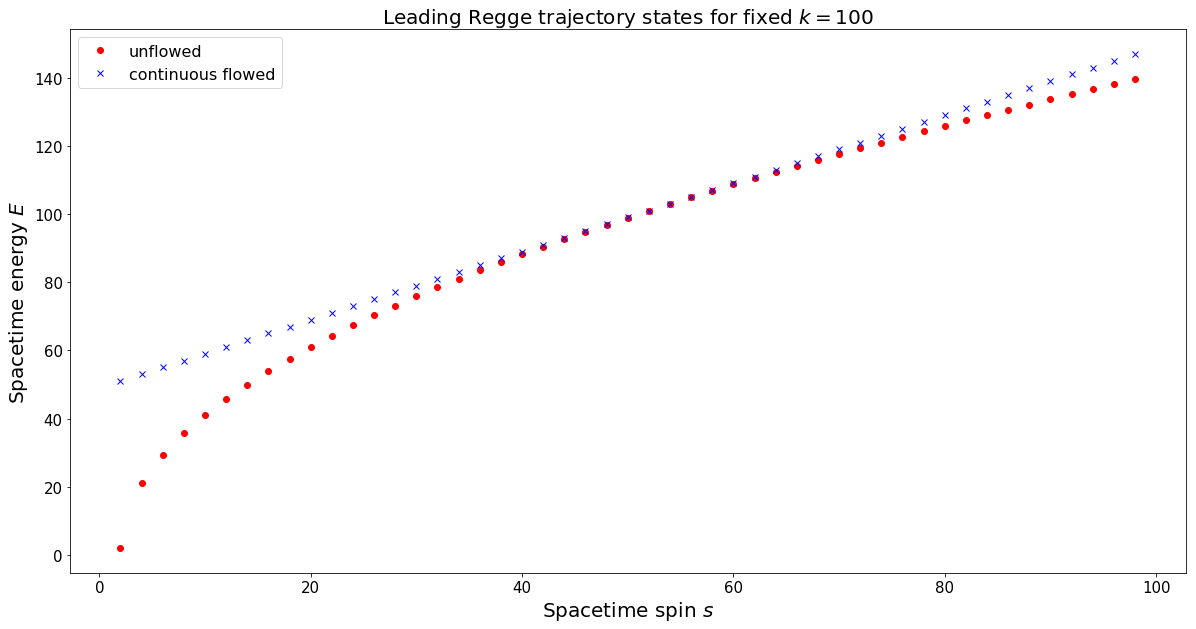

In [151]:
#Fix k
k=100
smax = 100
plt.figure(figsize=(20,10))
unf = []
cont = []
s_rg = []
for s in range(2,smax):
    if s % 2 == 0:
        unf.append(1+np.sqrt(1+2*k*(s-2)))
        cont.append(Econt(k,1,s))
        s_rg.append(s)
    
plt.plot(s_rg,unf,c='red',marker = 'o',linestyle='',label='unflowed')
plt.plot(s_rg,cont,c='blue',marker ='x',linestyle ='',label='continuous flowed')

plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Spacetime spin $s$',fontsize=20)
plt.ylabel('Spacetime energy $E$',fontsize=20)
plt.title('Leading Regge trajectory states for fixed $k = %d$'%k,fontsize=20) 
plt.show()

In [177]:
k=50
smax = 100
plt.figure(figsize=(20,10))
unf = []
cont = []
s_rg = []
for s in range(2,smax):
    if s % 2 == 0:
        unf.append(1+np.sqrt(1+2*k*(s-2)))
        cont.append(Econt(k,1,s))
        s_rg.append(s)
diff = []
for i in range(1,len(unf)):
    diff.append([s_rg[i],cont[i]-unf[i]])
diff

[[4, 12.832553121242176],
 [6, 8.9850156054992141],
 [8, 6.4946986557374728],
 [10, 4.7080566038301868],
 [12, 3.3714159608872478],
 [14, 2.3545530976730831],
 [16, 1.5800654555741929],
 [18, 0.99750195251488805],
 [20, 0.57180965215410851],
 [22, 0.27746150730991559],
 [24, 0.095183577040394596],
 [26, 0.0099999999999980105],
 [28, 0.0099999999999980105],
 [30, 0.08552551040303058],
 [32, 0.2286163007906481],
 [34, 0.43261936073745488],
 [36, 0.69190675270666446],
 [38, 1.0016672452900082],
 [40, 1.3577494328065995],
 [42, 1.7565415965261337],
 [44, 2.194878307604796],
 [46, 2.6699668375120638],
 [48, 3.1793284715535179],
 [50, 3.7207511947199805],
 [52, 4.2922511670514325],
 [54, 4.8920410715888352],
 [56, 5.5185038933074964],
 [58, 6.1701710317293674],
 [60, 6.8457039026815494],
 [62, 7.5438783725427498],
 [64, 8.2635715095598812],
 [66, 9.0037502441215622],
 [68, 9.7634616122015956],
 [70, 10.541824319923265],
 [72, 11.33802141696421],
 [74, 12.151293905692867],
 [76, 12.9809351439

In [138]:
all_Regge(25,0,10)

,k,omega,N,r,N bar,r bar,j,E,s
0,25,0,6.5,-7.0,6.5,7.0,12.757651,25.515301,-14.0
1,25,0,6.5,-7.0,6.5,6.0,12.757651,24.515301,-13.0
2,25,0,5.5,-6.0,5.5,6.0,11.691515,23.383029,-12.0
3,25,0,5.5,-6.0,5.5,5.0,11.691515,22.383029,-11.0
4,25,0,4.5,-5.0,4.5,5.0,10.512492,21.024984,-10.0
5,25,0,4.5,-5.0,4.5,4.0,10.512492,20.024984,-9.0
6,25,0,3.5,-4.0,3.5,4.0,9.174676,18.349352,-8.0
7,25,0,3.5,-4.0,3.5,3.0,9.174676,17.349352,-7.0
8,25,0,2.5,-3.0,2.5,3.0,7.588723,15.177447,-6.0
9,25,0,2.5,-3.0,2.5,2.0,7.588723,14.177447,-5.0


Note: the cap on the flowed Regge trajectories is artificial, all the lines are extended all the way to spin $s=\pm\infty$.

Let's see how things look like for $\omega =0,1$, as a function of $k$:

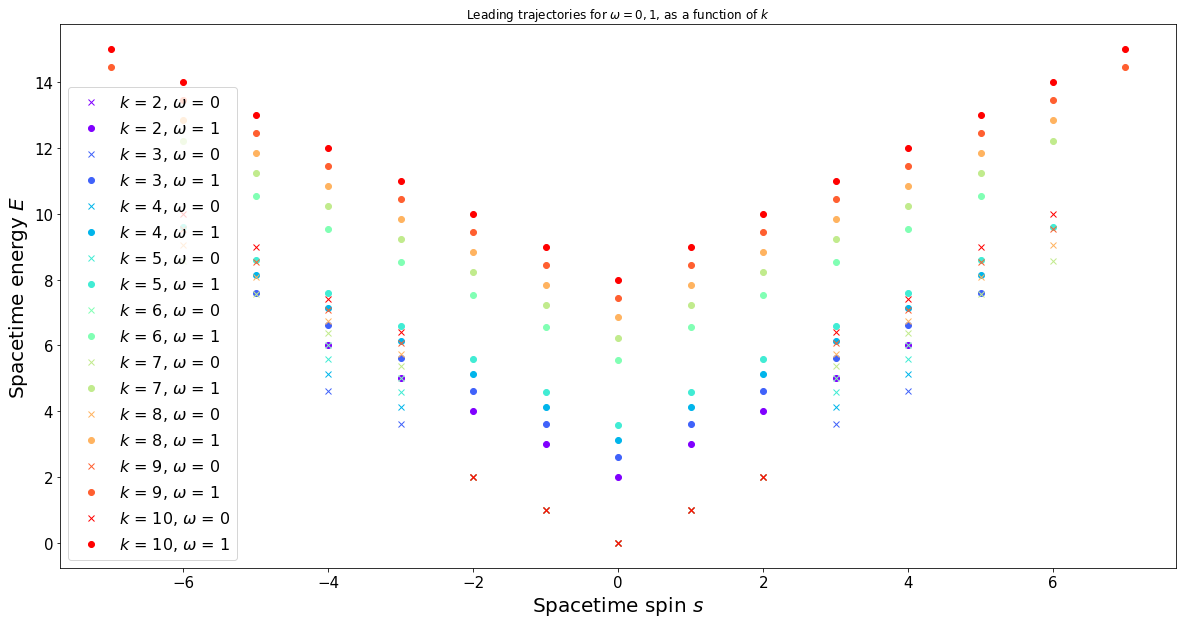

In [33]:
number_after_Nmax=4
#Fix the number of different k's to plot
n=10
#Assign colors to the different omegas
color=iter(cm.rainbow(np.linspace(0,1,n-1)))
plt.figure(figsize=(20,10))
for k in range(2,n+1):
    df_zero = all_Regge(k,0,number_after_Nmax)
    df_one = all_Regge(k,1,number_after_Nmax)
    s_axis_zero = df_zero['s']
    E_axis_zero = df_zero['E']
    s_axis_one = df_one['s']
    E_axis_one = df_one['E']
    c=next(color)
    plt.plot(s_axis_zero, E_axis_zero,c=c,linestyle='',marker ='x',label = '$k$ = %d, $\omega$ = %d' %(k,0))
    plt.plot(s_axis_one, E_axis_one,c=c,linestyle='',marker ='o',label = '$k$ = %d, $\omega$ = %d' %(k,1))
    plt.title('Leading trajectories for $\omega = 0,1$, as a function of $k$')
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Spacetime spin $s$',fontsize=20)
plt.ylabel('Spacetime energy $E$',fontsize=20)
plt.show()

Where do the Regge states come from for $\omega =1$? Let's see:

In [27]:
all_Regge(22,1,4)

,k,omega,N,r,N bar,r bar,j,E,s
0,22,1,4.0,-4.0,15.0,7.0,1.919742,28.839485,-11.0
1,22,1,4.0,-4.0,14.0,6.0,1.919742,27.839485,-10.0
2,22,1,4.0,-4.0,13.0,5.0,1.919742,26.839485,-9.0
3,22,1,4.0,-4.0,12.0,4.0,1.919742,25.839485,-8.0
4,22,1,4.0,-4.0,11.0,3.0,1.919742,24.839485,-7.0
5,22,1,4.0,-4.0,10.0,2.0,1.919742,23.839485,-6.0
6,22,1,4.0,-4.0,9.0,1.0,1.919742,22.839485,-5.0
7,22,1,4.0,-4.0,8.0,0.0,1.919742,21.839485,-4.0
8,22,1,4.0,-4.0,7.0,-1.0,1.919742,20.839485,-3.0
9,22,1,4.0,-4.0,6.0,-2.0,1.919742,19.839485,-2.0


And compare this with the graph:

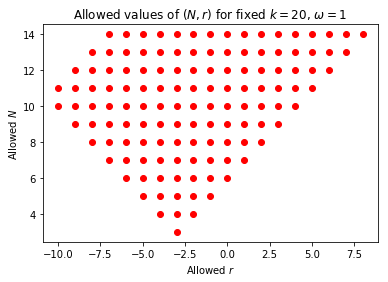

In [57]:
#fix rmax
number_after_Nmax=4
#Fix k
k=20
df_omega1 = pd.DataFrame(all_N_and_r(k,1,number_after_Nmax),columns=['omega', 'N', 'r'])
raxis_omega1 = df_omega1['r']
Naxis_omega1 = df_omega1['N']
plt.plot(raxis_omega1, Naxis_omega1,c='red',linestyle='',marker ='o')
    
plt.tick_params(axis='both', which='major')
plt.xlabel('Allowed $r$',fontsize=10)
plt.ylabel('Allowed $N$',fontsize=10)
plt.title('Allowed values of $(N,r)$ for fixed $k = %d$, $\omega = %d$'%(k,1),fontsize=12) 
    
plt.show()

We see that the lowest energy states with negative helicity have $N=3$, $r=-3$ for this value of $k$, corresponding to the lower vertex of the figure, whereas $\bar{N}$, $\bar{r}$ come from the right edge of allowed values. This is different from the unflowed case, in which the lowest energy states came each from one edge. Regge states with positive helicity are obtained by inverting left-right, that is they have $\bar{N}=3$, $\bar{r}=3$, whereas $N$, $r$ take values on the right edge.

For general $k$, it is easy to find out what are the coordinates of the lower vertex: it is the minimum allowed value of $N$, and the minimum $r$ for that value of the level. The on-shell condition tells us that $N>\frac{k+2}{8}$, so that the lower vertex has 
$$
N = \lceil \frac{k+2}{8} \rceil \; , r = - \lceil \frac{k+2}{8} \rceil \; .
$$

We can also easily write it down explictly:
$$
\left(\tilde{J}_{-1}^-\right)^{\lceil \frac{k+2}{8} \rceil}\vert j,j\rangle \; .
$$

The norm of this state is given by
$$
\vert\vert \left(\tilde{J}_{-1}^-\right)^{\lceil \frac{k+2}{8} \rceil}\vert j,j\rangle\vert\vert^2= \prod\limits_{\ell=1}^{\lceil \frac{k+2}{8} \rceil}  \ell \left( k+2-2j+\ell-1 \right) \langle j\vert j \rangle \; .
$$

This norm is never zero, for any value of $k$.

Here is how to get the values of $j$ of the Regge states with $\omega =1$, as a function of $k$:

In [36]:
import math
def j_vertex_omega1(k,kmax):
    j_range=[]
    while k <= kmax:
        if ((k+2)/8) % 1 == 0:
            j_range.append(j(k,1,((k+2)/8)+1,-((k+2)/8)-1))
        else:
            j_range.append (j(k,1,math.ceil(((k+2)/8)),-math.ceil(((k+2)/8))))
        k+=1
    return j_range